In [1]:
#Instalar o plotly
#pip install plotly==4.14.1

In [2]:
#IMPORTA LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_theme(style="whitegrid")
sns.set(font="Arial")

### IMPORTA DADOS

In [3]:
#local dos datasets
folder_name = "D:\\PUC_MINAS\\TCC\\Dataset\\tweets"

#função para listar aquivos
def lista_arquivos():
    list_files = []
    for file in os.listdir(folder_name):
        list_files.append(file)
    return list_files   

#recebe todos as linhas
files = lista_arquivos()

In [4]:
#lista de datasets utilizados na pesquisa
print('Lista de datasets para a pesquisa: \n {}\n'.format(files))
print('Total de {} arquivos importados.'.format(len(files)))

Lista de datasets para a pesquisa: 
 ['alvarodias__election_tweets.csv', 'cabodaciolo_election_tweets.csv', 'cirogomes_election_tweets.csv', 'eymaeloficial_election_tweets.csv', 'geraldoalckmin_election_tweets.csv', 'guilhermeboulos_election_tweets.csv', 'haddad_fernando_election_tweets.csv', 'jairbolsonaro_election_tweets.csv', 'joaoamoedonovo_election_tweets.csv', 'joaogoulart54_election_tweets.csv', 'lulaoficial_election_tweets.csv', 'marinasilva_election_tweets.csv', 'meirelles_election_tweets.csv', 'verapstu_election_tweets.csv']

Total de 14 arquivos importados.


In [5]:
#Os campos são separados por ";". No entanto, existem esses caracteres no campo de mensagem
#Optou-se por usar a biblioteca csv, ao invés do pandas
#importar linhas
import csv
def importa_linhas():
    list_rows = []
    for file in files:
        with open(folder_name + "\\" + file, "r", encoding='utf-8') as f:
            rows = csv.reader(f, delimiter=';')
            for i, row in enumerate(rows):
                no_user = file.split('_')
                row.append(no_user[0])
                if(i > 0):
                    list_rows.append(row)
    return list_rows
rows = importa_linhas()
df = pd.DataFrame(rows, columns = ['id','data_msg','tweet','num_retweets','num_likes','user'])
df.head(10)

id             data_msg  \
0  1056291241384644609  2018-10-27 21:07:11   
1  1056084752371933184  2018-10-27 07:26:40   
2  1053461920639057920  2018-10-20 01:44:28   
3  1053461098169622529  2018-10-20 01:41:12   
4  1053071583286386689  2018-10-18 23:53:25   
5  1052725022135971840  2018-10-18 00:56:18   
6  1051297553705254912  2018-10-14 02:24:03   
7  1051252139236962304  2018-10-13 23:23:35   
8  1051247214419423235  2018-10-13 23:04:01   
9  1051242566115610631  2018-10-13 22:45:33   

                                               tweet num_retweets num_likes  \
0  NAÇÃO BRASILEIRA.                         Conh...           55       839   
1  Seguirei o caminho da integridade;quando virás...           59      1094   
2                            https://t.co/BvTWDIZdiO          893      6128   
3  Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                            @isamovitz Deus abençoe            0        12   
5  Eu posso ser crente menino, mas não adultero.E...          574      4296   
6                 @andersonfelix94 Deus te abençoe 🙏            3       172   
7  @higxrr @YouTube Deus abençoe sr José Glória a...            2        52   
8    @avrc41 @Jotapecrf_99 Deus te abençoe meu amigo            1       276   
9  Decifrando Códigos: Estátua da Liberdade (Hist...           82       471   

          user  
0  cabodaciolo  
1  cabodaciolo  
2  cabodaciolo  
3  cabodaciolo  
4  cabodaciolo  
5  cabodaciolo  
6  cabodaciolo  
7  cabodaciolo  
8  cabodaciolo  
9  cabodaciolo

In [6]:
#Quantidade de linhas importadas
print('Total de {} linhas importadas.'.format(len(df)))

Total de 12286 linhas importadas.


In [7]:
#verifica se há linhas com dados vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12286 entries, 0 to 12285
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12286 non-null  object
 1   data_msg      12286 non-null  object
 2   tweet         12286 non-null  object
 3   num_retweets  12286 non-null  object
 4   num_likes     12286 non-null  object
 5   user          12286 non-null  object
dtypes: object(6)
memory usage: 576.0+ KB


In [8]:
#verifica se há dados duplicados
df.duplicated().value_counts()

False    12286
dtype: int64

### Tratamento dos dados

In [9]:
def dia_da_semana(week_day):
    week_days = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    l_dias_semana = ['Dom','Seg','Ter','Qua','Qui','Sex','Sab']
    dias_semana = []
    for wd in week_day:
        idx = 0
        for w in week_days:
            if(w == wd):
                dias_semana.append(l_dias_semana[idx])
            idx = idx + 1
    return dias_semana
    

In [10]:
def data_resumida(data):
    data_resumo = []
    for d in data:
        dt = d.split(' ')
        dt = dt[0].split('-')
        dt = dt[2] + '/' + dt[1]
        data_resumo.append(dt)
    return data_resumo

In [11]:
#Tratar data e hora
df = df.copy()
#Novas colunas
df.loc[:, 'data'] = df.data_msg.astype('datetime64[D]')
df.loc[:, 'data_resumo'] = data_resumida(df.data_msg)
df.loc[:, 'dia'] = df.data.dt.day
df.loc[:, 'dia_semana'] = dia_da_semana(df.data.dt.day_name())
df.loc[:, 'mes'] = df.data.dt.month
df.loc[:, 'ano'] = df.data.dt.year
df.loc[:, 'mensagem'] = df.tweet.apply(lambda x: ' '.join(list([r for r in x.split(' ') if(r[0:4]!='http')])))
df.loc[:, 'http'] = df.tweet.apply(lambda x: ' '.join(list([r for r in x.split(' ') if(r[0:4]=='http')])))
df.loc[:, 'tam_mensagem'] = df.tweet.apply(lambda x: len(x))

In [12]:
#Excluir algumas colunas desnecessárias
#df.drop(columns=['id','tweet','data_msg'], inplace=True)
df.drop(columns=['id','data_msg'], inplace=True)
df.head()

tweet num_retweets num_likes  \
0  NAÇÃO BRASILEIRA.                         Conh...           55       839   
1  Seguirei o caminho da integridade;quando virás...           59      1094   
2                            https://t.co/BvTWDIZdiO          893      6128   
3  Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                            @isamovitz Deus abençoe            0        12   

          user       data data_resumo  dia dia_semana  mes   ano  \
0  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
1  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
2  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
3  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
4  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   

                                            mensagem                     http  \
0  NAÇÃO BRASILEIRA.                         Conh...  https://t.co/4fONrjpi4u   
1  Seguirei o caminho da integridade;quando virás...  https://t.co/2GScum3nct   
2                                                     https://t.co/BvTWDIZdiO   
3                   Voto em cédulas JÁ!Glória a Deus  https://t.co/kG0X7YliKB   
4                            @isamovitz Deus abençoe                            

   tam_mensagem  
0           207  
1           170  
2            23  
3            56  
4            23

In [13]:
#verifica quanto retweets foram feitos
rt = df.mensagem.apply(lambda x: ' '.join(list([r for r in x.split(' ') if(r[0:2].lower()=='rt')])))
rt = pd.DataFrame(rt, columns=['rt'])
rt = rt[rt['rt']==True]
len(rt)

0

In [14]:
#verifica hashtags foram encontradas nas mensagens
#os hashtags encontrados foram postos eem lower case para contabilizar o número de ocorrências
mensagens = df['mensagem'].tolist()
l_hashtags = []
for m in mensagens:
    for texto in m.split():
        if(texto[0] == '#'):
            l_hashtags.append(texto.lower().replace('##','#'))
            ' '.join(l_hashtags)

df_hashtags = pd.DataFrame(l_hashtags, columns=['hashtags'])
df_hashtags.head()

hashtags
0         #daciolonaglobo
1         #daciolonaglobo
2           #marianagodoy
3                #daciolo
4  #daciolopresidente2018

In [15]:
#verifica hashtags duplicadas
df_hashtags.duplicated().value_counts()

True     15303
False      746
dtype: int64

In [16]:
#contabiliza a quantidade de ocorrências de cada hashtag encontrada
df_hashtags_qtde = df_hashtags.groupby(['hashtags']).size().reset_index(name='quantidade')
df_hashtags_qtde.head()

hashtags  quantidade
0            #13!           2
1     #2018chegou           1
2   #2anosdogolpe           1
3  #50tonsdetemer           1
4    #7desetembro           1

In [17]:
#remove hashtags duplicadas
l_hashtags = list(dict.fromkeys(l_hashtags))
df_hashtags_sem_duplicidades = pd.DataFrame(l_hashtags, columns=['hashtags'])
df_hashtags_sem_duplicidades.head()

hashtags
0         #daciolonaglobo
1           #marianagodoy
2                #daciolo
3  #daciolopresidente2018
4           #debaterecord

In [18]:
#verifica hashtags duplicadas foram retiradas
df_hashtags_sem_duplicidades.duplicated().value_counts()

False    746
dtype: int64

In [19]:
#Quantidade de hashtags encontradas
print('Total de {} hashtags encontradas.'.format(len(df_hashtags_sem_duplicidades)))

Total de 746 hashtags encontradas.


### Análise de dados

In [20]:
#dataframe de referencia
df.head()

tweet num_retweets num_likes  \
0  NAÇÃO BRASILEIRA.                         Conh...           55       839   
1  Seguirei o caminho da integridade;quando virás...           59      1094   
2                            https://t.co/BvTWDIZdiO          893      6128   
3  Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                            @isamovitz Deus abençoe            0        12   

          user       data data_resumo  dia dia_semana  mes   ano  \
0  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
1  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
2  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
3  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
4  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   

                                            mensagem                     http  \
0  NAÇÃO BRASILEIRA.                         Conh...  https://t.co/4fONrjpi4u   
1  Seguirei o caminho da integridade;quando virás...  https://t.co/2GScum3nct   
2                                                     https://t.co/BvTWDIZdiO   
3                   Voto em cédulas JÁ!Glória a Deus  https://t.co/kG0X7YliKB   
4                            @isamovitz Deus abençoe                            

   tam_mensagem  
0           207  
1           170  
2            23  
3            56  
4            23

In [21]:
#Ver a quantidade de mensagens por usuarios
df_qtde_mensagens = df.groupby(['user']).size().reset_index(name='quantidade')
df_qtde_mensagens = df_qtde_mensagens.nlargest(columns = "quantidade", n = 50)
df_qtde_mensagens

user  quantidade
11        meirelles        3195
9       lulaoficial        1572
7    joaoamoedonovo        1497
5            haddad        1384
1         cirogomes        1151
4   guilhermeboulos        1124
6     jairbolsonaro         792
3    geraldoalckmin         695
10      marinasilva         560
12         verapstu         133
8     joaogoulart54          84
0       cabodaciolo          66
2     eymaeloficial          33

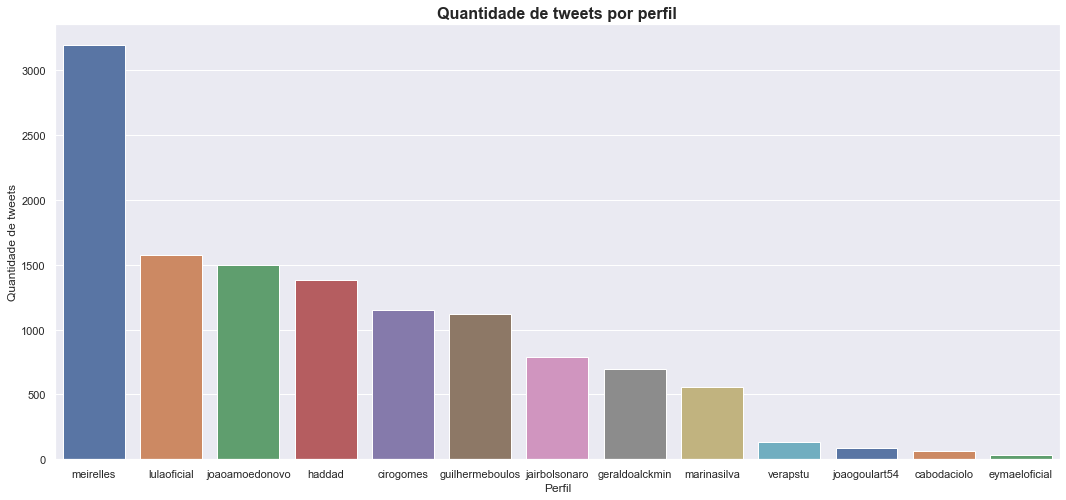

In [22]:
#Gráfico quantidade x user
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_qtde_mensagens, x= "user", y = "quantidade", palette="deep")
ax.set(ylabel = "Quantidade de tweets", xlabel = "Perfil")
plt.title('Quantidade de tweets por perfil', fontsize=16, fontweight='bold')
plt.show()

In [23]:
df_hashtags_qtde = df_hashtags_qtde.nlargest(columns = "quantidade", n = 10)
df_hashtags_qtde

hashtags  quantidade
269           #equipehm        2591
97     #chamaomeirelles        1589
496        #meirelles15        1200
723    #votemeirelles15         895
110             #ciro12         698
101  #chamaomeirelles15         663
274           #equipeja         530
106   #chamaomeirelles💪         423
676       #vemcomjoão30         413
364   #haddadpresidente         344

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0, flags=flags)


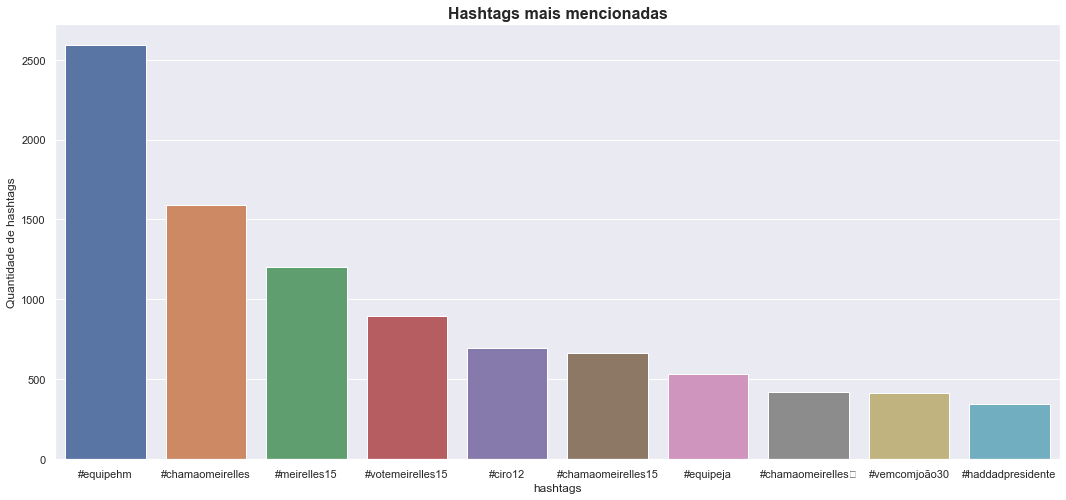

In [24]:
#Gráfico hashtags mais relevantes
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_hashtags_qtde, x= "hashtags", y = "quantidade", palette="deep")
ax.set(ylabel = "Quantidade de hashtags", xlabel = "hashtags")
plt.title('Hashtags mais mencionadas', fontsize=16, fontweight='bold')
plt.show()

In [25]:
#Verifica caracteristicas do tamanho das mensagens
df['tam_mensagem'].describe()

count    12286.000000
mean       153.296516
std         77.048837
min          2.000000
25%         92.000000
50%        140.000000
75%        212.000000
max        553.000000
Name: tam_mensagem, dtype: float64

In [26]:
#Verifica qual mensagem tem apenas 2 caracteres
df[df['tam_mensagem']==2]

tweet num_retweets num_likes           user       data data_resumo  dia  \
4640    🇧🇷         2223     13898  jairbolsonaro 2018-10-19       19/10   19   
4641    👍🏻         4431     29762  jairbolsonaro 2018-10-19       19/10   19   

     dia_semana  mes   ano mensagem http  tam_mensagem  
4640        Sex   10  2018       🇧🇷                  2  
4641        Sex   10  2018       👍🏻                  2

In [27]:
#Verifica qual mensagem tem 553 caracteres
df[df['tam_mensagem']==553]

tweet num_retweets  \
11028  @gronkoloco @Bopressor20 @IvoSales @RobertoVid...            0   

      num_likes       user       data data_resumo  dia dia_semana  mes   ano  \
11028         0  meirelles 2018-08-27       27/08   27        Seg    8  2018   

                                                mensagem http  tam_mensagem  
11028  @gronkoloco @Bopressor20 @IvoSales @RobertoVid...                553

In [28]:
print('Mensagem com maior tamanho de mensagem: {}.'.format(df.iloc[11028]['mensagem']))

Mensagem com maior tamanho de mensagem: @gronkoloco @Bopressor20 @IvoSales @RobertoVidall @Cookieleena @HugoRebal @celloduarte @gizelle_galvao @Jeanmilton @mskanaan @douradorogers @RobenUDI @neusamandrade @TheGodFather_75 @LLSi @pubaldi24 @CaptJoao @valmarkss @letrin45 @angelicaguirele @azulsagaz @mrsouzar @JoelAlexandreM Olá, Gronko. O Meirelles n teve qualquer cargo de gestão no grupo J&amp;F, era apenas 1 consultor empresarial. Como foi de várias outras empresas dentro e fora do 🇧🇷. Decisões administrativas são de responsabilidade dos gestores. #ChamaOMeirelles #EquipeHM #Meirelles15.


In [29]:
#Período das mensagens
data_min = min(df['data'])
data_max = max(df['data'])
print('Período de envio das mensagens: {} a {}.'.format(data_min,data_max))

Período de envio das mensagens: 2018-08-16 00:00:00 a 2018-10-28 00:00:00.


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


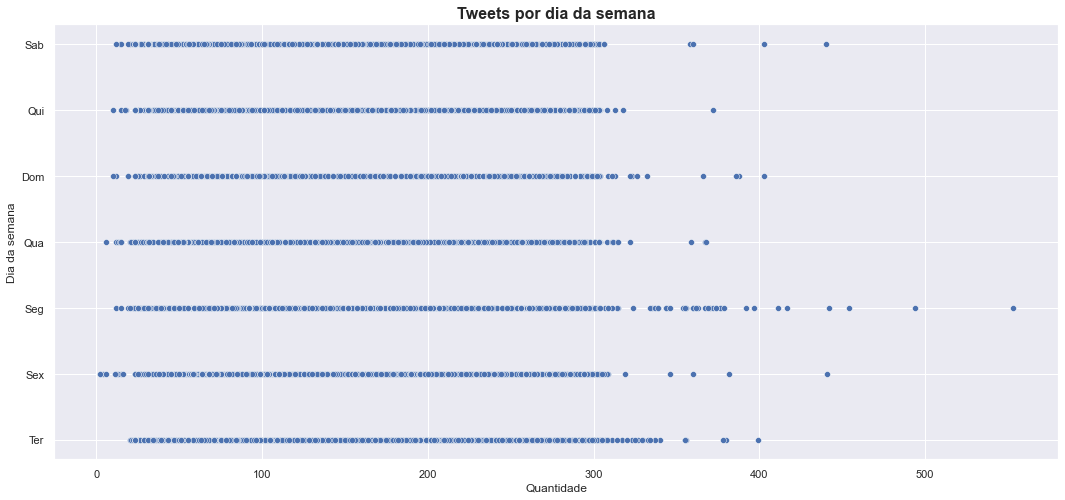

In [30]:
#Números de tweets por data
plt.figure(figsize=(18,8))
ax = sns.scatterplot(df['tam_mensagem'],df['dia_semana'])
ax.set(ylabel = "Dia da semana", xlabel = "Quantidade")
plt.title('Tweets por dia da semana', fontsize=16, fontweight='bold')
plt.show()

In [31]:
df_msg_por_data = df.groupby(['mes']).size().reset_index(name='quantidade')
df_msg_por_data

mes  quantidade
0    8        2718
1    9        5715
2   10        3853

In [32]:
#Tweets por data candidatos primeiro turno
df_primeiro_turno = df[(df['data'] < '2018-10-07')]
df_candidato_data = df_primeiro_turno.groupby(['data','data_resumo','user']).size().reset_index(name='quantidade')
df_candidato_data.head()

data data_resumo             user  quantidade
0 2018-08-16       16/08        cirogomes           8
1 2018-08-16       16/08    eymaeloficial           1
2 2018-08-16       16/08   geraldoalckmin           4
3 2018-08-16       16/08  guilhermeboulos          23
4 2018-08-16       16/08           haddad          10

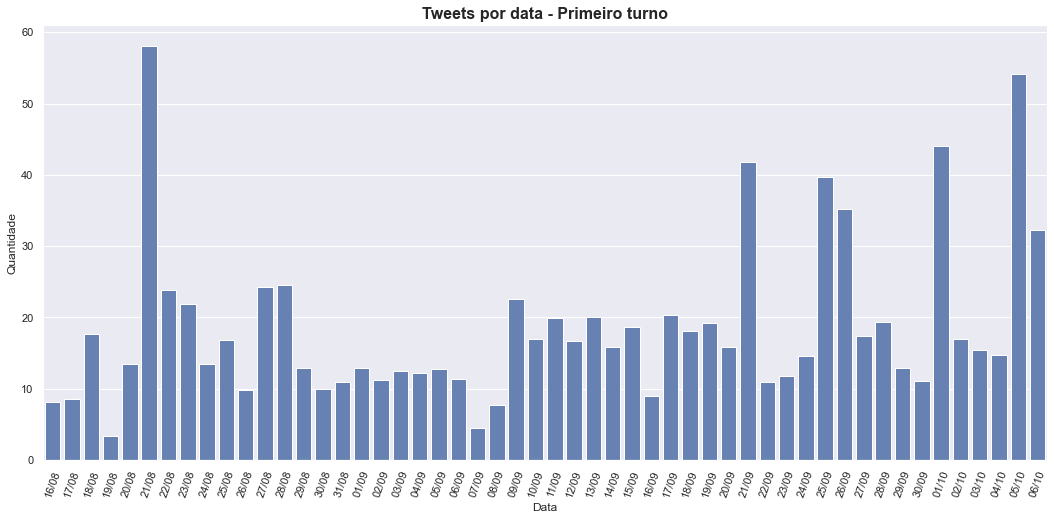

In [33]:
#Gráfico Total de tweets por data primeiro turno
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_candidato_data, x= "data_resumo", y = "quantidade", color="#597DBF",ci=None)
ax.set(ylabel = "Quantidade", xlabel = "Data")
plt.xticks(rotation=70)
plt.title('Tweets por data - Primeiro turno', fontsize=16, fontweight='bold')
plt.show()

In [34]:
#Tweets por data candidatos primeiro turno
df_primeiro_turno = df[(df['data'] <= '2018-10-07')]
df_candidato_mensagens = df_primeiro_turno.groupby(['user']).size().reset_index(name='quantidade')
df_candidato_mensagens = df_candidato_mensagens.nlargest(columns = "quantidade", n = 20)
df_candidato_mensagens

user  quantidade
11        meirelles        3189
7    joaoamoedonovo        1390
1         cirogomes        1144
4   guilhermeboulos         997
9       lulaoficial         949
5            haddad         792
3    geraldoalckmin         692
10      marinasilva         537
6     jairbolsonaro         428
12         verapstu         128
8     joaogoulart54          79
0       cabodaciolo          51
2     eymaeloficial          31

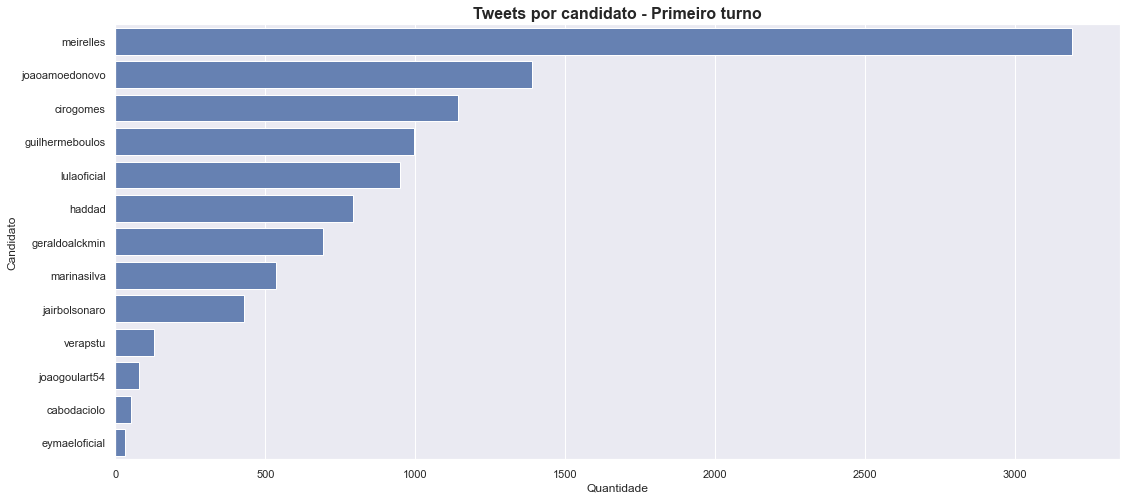

In [35]:
#Gráfico Total de tweets por candidato primeiro turno
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_candidato_mensagens, y= "user", x = "quantidade"
                 , color="#597DBF"
                 ,orient = 'h'
                 ,ci=None)
ax.set(ylabel = "Candidato", xlabel = "Quantidade")
plt.title('Tweets por candidato - Primeiro turno', fontsize=16, fontweight='bold')
plt.show()

In [36]:
#Verifica segundo turno
#Analisado apenas os perfis de Fernando Haddad e Jair Bolsonaro
df_seg_turno = df[(df['user'] == 'jairbolsonaro') | (df['user'] == 'haddad')]
df_seg_turno = df_seg_turno[(df_seg_turno['data'] > '2018-10-07')]
df_seg_turno.head()

tweet num_retweets  \
3069  Gostaria de agradecer os 45 milhões de eleitor...        40670   
3070  Gostaria de agradecer meus antepassados que me...        19379   
3071                    #AOVIVO https://t.co/0mOamnlDKz         1572   
3072  Neste domingo, conto com seu voto para recobra...        16978   
3073  É inadmissível o assassinato de um jovem, Char...        10491   

     num_likes    user       data data_resumo  dia dia_semana  mes   ano  \
3069    257046  haddad 2018-10-28       28/10   28        Dom   10  2018   
3070    122490  haddad 2018-10-28       28/10   28        Dom   10  2018   
3071      9873  haddad 2018-10-28       28/10   28        Dom   10  2018   
3072     76105  haddad 2018-10-28       28/10   28        Dom   10  2018   
3073     47230  haddad 2018-10-28       28/10   28        Dom   10  2018   

                                               mensagem  \
3069  Gostaria de agradecer os 45 milhões de eleitor...   
3070  Gostaria de agradecer meus antepassados que me...   
3071                                            #AOVIVO   
3072  Neste domingo, conto com seu voto para recobra...   
3073  É inadmissível o assassinato de um jovem, Char...   

                         http  tam_mensagem  
3069                                    132  
3070                                    161  
3071  https://t.co/0mOamnlDKz            31  
3072                                    276  
3073                                    272

In [37]:
#Quantidade de mensagens no segundo turno para os candidatos concorrentes
df_msg_candidatos = df_seg_turno.groupby(['user']).size().reset_index(name='quantidade')
df_msg_candidatos

user  quantidade
0         haddad         592
1  jairbolsonaro         364

In [38]:
#Gráfico % de mensagens enviadas pelos candidatos concorrentes no segundo turno
fig = go.Figure(data = [go.Pie(labels = [df_msg_candidatos['user'][0] + ' (' + str(df_msg_candidatos['quantidade'][0]) + ')'
                                         ,df_msg_candidatos['user'][1] + ' (' + str(df_msg_candidatos['quantidade'][1]) + ')']
                               ,values = [df_msg_candidatos['quantidade'][0], df_msg_candidatos['quantidade'][1]]
                               ,hole = .4,showlegend=False
                               , textinfo = 'label+percent', hoverinfo = 'value')])
fig.update_layout(template="plotly", title = go.layout.Title(text = "Total de tweets por candidato",xref = "paper", x=0.5))
fig.update_traces(textposition='inside', textfont=dict(size=13,color="white"))
fig.show()

In [39]:
df_candidato_dia_semana = df_seg_turno.groupby(['user','dia_semana']).size().reset_index(name='quantidade')
df_candidato_dia_semana

user dia_semana  quantidade
0          haddad        Dom          30
1          haddad        Qua          91
2          haddad        Qui          89
3          haddad        Sab         118
4          haddad        Seg          80
5          haddad        Sex          75
6          haddad        Ter         109
7   jairbolsonaro        Dom          68
8   jairbolsonaro        Qua          49
9   jairbolsonaro        Qui          60
10  jairbolsonaro        Sab          49
11  jairbolsonaro        Seg          33
12  jairbolsonaro        Sex          60
13  jairbolsonaro        Ter          45

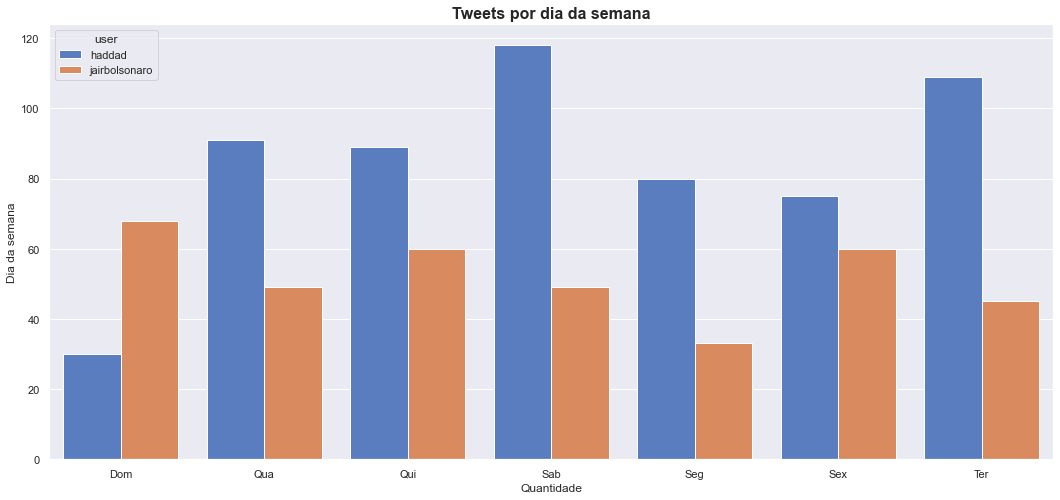

In [40]:
#Números de tweets por dia da semana
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_candidato_dia_semana["dia_semana"]
                    , y=df_candidato_dia_semana["quantidade"]
                    , data=df_candidato_dia_semana
                    , palette="muted"
                   ,hue=df_candidato_dia_semana["user"])


ax.set(ylabel = "Dia da semana", xlabel = "Quantidade")
plt.title('Tweets por dia da semana', fontsize=16, fontweight='bold')
plt.show()

In [41]:
#Tweets por data candidatos segundo turno
df_candidato_data = df_seg_turno.groupby(['user','data_resumo']).size().reset_index(name='quantidade')
df_candidato_data.head()

user data_resumo  quantidade
0  haddad       08/10          37
1  haddad       09/10          33
2  haddad       10/10          31
3  haddad       11/10          26
4  haddad       12/10          21

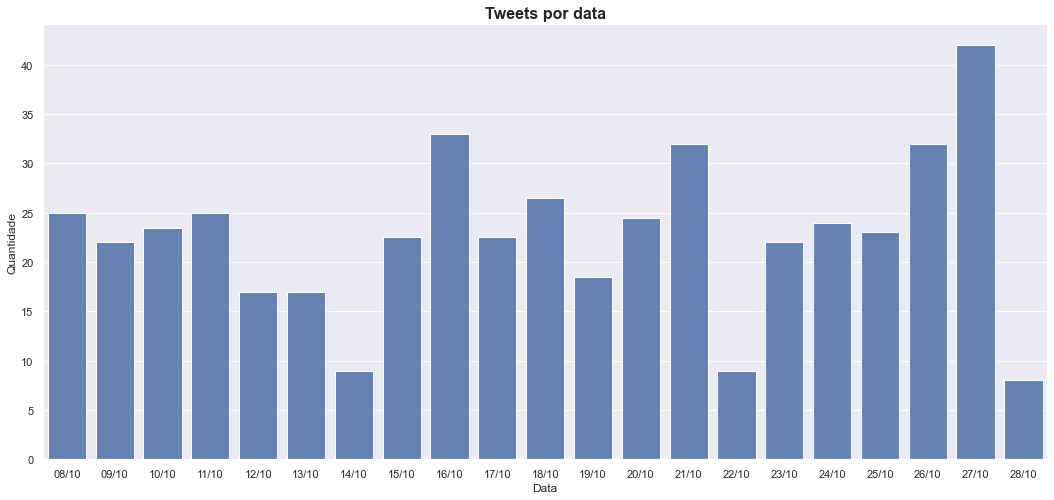

In [42]:
#Gráfico Total de tweets por data segundo turno
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_candidato_data, x= "data_resumo", y = "quantidade", color="#597DBF",ci=None)
ax.set(ylabel = "Quantidade", xlabel = "Data")
plt.title('Tweets por data', fontsize=16, fontweight='bold')
plt.show()

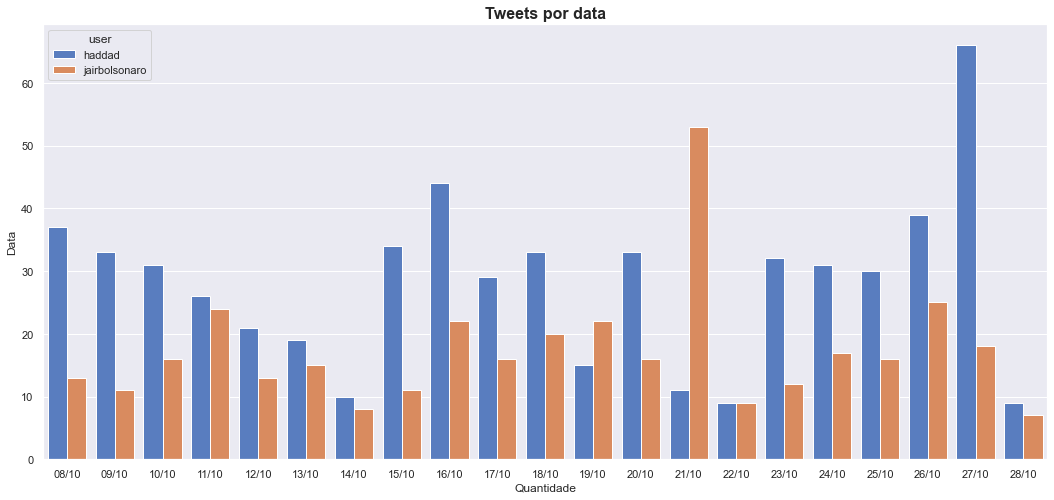

In [43]:
#Gráfico Tweets por data candidatos segundo turno
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_candidato_data["data_resumo"]
                    , y=df_candidato_data["quantidade"]
                    , data=df_candidato_data
                    , palette="muted"
                   ,hue=df_candidato_data["user"])
ax.set(ylabel = "Data", xlabel = "Quantidade")
plt.title('Tweets por data', fontsize=16, fontweight='bold')
plt.show()

### Modelos de machine learning

In [44]:
#caso haja a necessidade de importar a biblioteca
#pip install Unidecode

In [45]:
#IMPORTAR LIBRARIES ML
import nltk
import re
import string
import unidecode
from string import punctuation
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams
nltk.download("stopwords") 
token_espaco = tokenize.WhitespaceTokenizer()
#palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
df.head()

tweet num_retweets num_likes  \
0  NAÇÃO BRASILEIRA.                         Conh...           55       839   
1  Seguirei o caminho da integridade;quando virás...           59      1094   
2                            https://t.co/BvTWDIZdiO          893      6128   
3  Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                            @isamovitz Deus abençoe            0        12   

          user       data data_resumo  dia dia_semana  mes   ano  \
0  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
1  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
2  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
3  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
4  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   

                                            mensagem                     http  \
0  NAÇÃO BRASILEIRA.                         Conh...  https://t.co/4fONrjpi4u   
1  Seguirei o caminho da integridade;quando virás...  https://t.co/2GScum3nct   
2                                                     https://t.co/BvTWDIZdiO   
3                   Voto em cédulas JÁ!Glória a Deus  https://t.co/kG0X7YliKB   
4                            @isamovitz Deus abençoe                            

   tam_mensagem  
0           207  
1           170  
2            23  
3            56  
4            23

In [47]:
#Vetorizar mensagens
#bag of words
vetorizar = CountVectorizer(lowercase = False, max_features = 1000)
bag_of_words = vetorizar.fit_transform(df["mensagem"])
print(bag_of_words.shape)

(12286, 1000)


In [48]:
#pip install wordcloud #caso seja necessário

In [49]:
%matplotlib inline
from wordcloud import WordCloud
def nuvem_palavras(coluna):
    todas_palavras = ' '.join([texto for texto in coluna])
    nuvem_palavras = WordCloud(width = 1200, height = 600,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

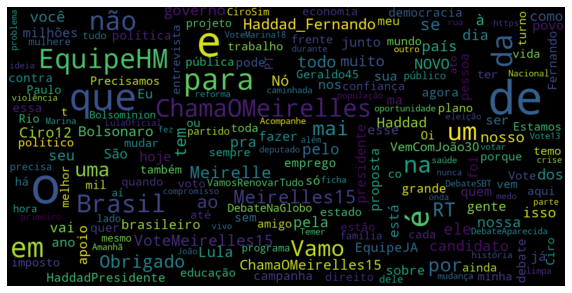

In [50]:
#Nuvem de palavras sem tratamento
nuvem_palavras(df["mensagem"])

In [51]:
#Tratar textos
def retirar_texto_com_arroba_hashtag_outros(texto):
    #excluir conteudos com @ e #
    caracteres = ['@','#']
    nova_msg = list()
    for t in texto:
        frase = list()
        conteudo_msg = token_espaco.tokenize(t)
        for msg in conteudo_msg:
            if msg[0] not in caracteres:
                  frase.append(msg)
        nova_msg.append(' '.join(frase))
    return nova_msg

df["mensagem"] = retirar_texto_com_arroba_hashtag_outros(df["mensagem"])
print("Frase tratada:\n")
print(df["mensagem"][0])

Frase tratada:

NAÇÃO BRASILEIRA. Conheço as suas obras, sei que você não é frio nem quente. Melhor seria que fosse frio ou quente! Assim, porque você é morno, não é frio nem…


In [52]:
#Retirar pontuação
def retirar_pontuacao(texto):
    pontuacao = list()
    for ponto in string.punctuation:
        pontuacao.append(ponto)
    token_pontuacao = tokenize.WordPunctTokenizer()
    nova_msg = list()
    for t in texto:
        frase = list()
        conteudo_msg = token_pontuacao.tokenize(t)
        for msg in conteudo_msg:
            if msg not in pontuacao:
                  frase.append(msg.lower())
        nova_msg.append(' '.join(frase))
    return nova_msg

df["mensagem"] = retirar_pontuacao(df["mensagem"])
print("Frase tratada:\n")
print(df["mensagem"][0])

Frase tratada:

nação brasileira conheço as suas obras sei que você não é frio nem quente melhor seria que fosse frio ou quente assim porque você é morno não é frio nem …


In [53]:
#instalar emoji se necessário
#pip install emoji --upgrade

In [54]:
#Retirar acentos
import emoji
from nltk.tokenize.casual import TweetTokenizer

def retirar_acentos(texto):
    #token_pontuacao = TweetTokenizer()
    token_pontuacao = tokenize.WordPunctTokenizer()
    nova_msg = list()
    for t in texto:
        frase = list()
        conteudo_msg = token_pontuacao.tokenize(t)
        for msg in conteudo_msg:
            if(msg not in emoji.UNICODE_EMOJI):
                frase.append(unidecode.unidecode(msg))
            else:
                frase.append(msg)
        nova_msg.append(' '.join(frase))
    return nova_msg

#teste = retirar_acentos(df["mensagem"])
#teste[4640]

df["mensagem"] = retirar_acentos(df["mensagem"])
print("Frase tratada:\n")
print(df["mensagem"][0])

Frase tratada:

nacao brasileira conheco as suas obras sei que voce nao e frio nem quente melhor seria que fosse frio ou quente assim porque voce e morno nao e frio nem ...


In [55]:
#Remover linhas sem tweets
df = df.query("mensagem != ''")
df.head()

tweet num_retweets num_likes  \
0  NAÇÃO BRASILEIRA.                         Conh...           55       839   
1  Seguirei o caminho da integridade;quando virás...           59      1094   
3  Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                            @isamovitz Deus abençoe            0        12   
5  Eu posso ser crente menino, mas não adultero.E...          574      4296   

          user       data data_resumo  dia dia_semana  mes   ano  \
0  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
1  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
3  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
4  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   
5  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   

                                            mensagem                     http  \
0  nacao brasileira conheco as suas obras sei que...  https://t.co/4fONrjpi4u   
1  seguirei o caminho da integridade quando viras...  https://t.co/2GScum3nct   
3                   voto em cedulas ja gloria a deus  https://t.co/kG0X7YliKB   
4                                       deus abencoe                            
5  eu posso ser crente menino mas nao adultero eu...  https://t.co/GwYTxXhMxW   

   tam_mensagem  
0           207  
1           170  
3            56  
4            23  
5           118

In [56]:
#Tratar textos irrelevantes
def retirar_stop_words(texto):
    stop_words = nltk.corpus.stopwords.words("portuguese")
    token_pontuacao = tokenize.WordPunctTokenizer()
    nova_msg = list()
    for t in texto:
        frase = list()
        conteudo_msg = token_pontuacao.tokenize(t)
        for msg in conteudo_msg:
            if msg not in stop_words:
                  frase.append(msg.lower())
        nova_msg.append(' '.join(frase))
    return nova_msg

df["mensagem_tratada"] = retirar_stop_words(df["mensagem"])
print("Frase tratada:\n")
print(df["mensagem_tratada"][0])

Frase tratada:

nacao brasileira conheco obras sei voce nao frio quente melhor frio quente assim porque voce morno nao frio ...


In [57]:
df.head()

tweet num_retweets num_likes  \
0  NAÇÃO BRASILEIRA.                         Conh...           55       839   
1  Seguirei o caminho da integridade;quando virás...           59      1094   
3  Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                            @isamovitz Deus abençoe            0        12   
5  Eu posso ser crente menino, mas não adultero.E...          574      4296   

          user       data data_resumo  dia dia_semana  mes   ano  \
0  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
1  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
3  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
4  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   
5  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   

                                            mensagem                     http  \
0  nacao brasileira conheco as suas obras sei que...  https://t.co/4fONrjpi4u   
1  seguirei o caminho da integridade quando viras...  https://t.co/2GScum3nct   
3                   voto em cedulas ja gloria a deus  https://t.co/kG0X7YliKB   
4                                       deus abencoe                            
5  eu posso ser crente menino mas nao adultero eu...  https://t.co/GwYTxXhMxW   

   tam_mensagem                                   mensagem_tratada  
0           207  nacao brasileira conheco obras sei voce nao fr...  
1           170  seguirei caminho integridade viras encontro ca...  
3            56                        voto cedulas ja gloria deus  
4            23                                       deus abencoe  
5           118  posso ser crente menino nao adultero posso ser...

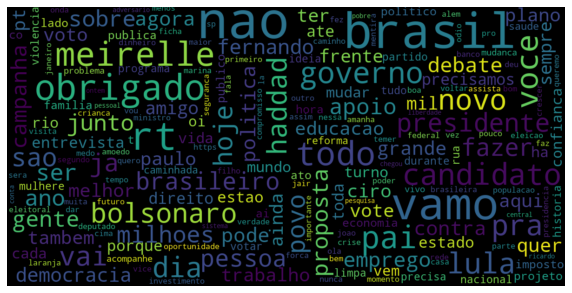

In [58]:
#Verifica nuvem de palavras após tratamento
nuvem_palavras(df["mensagem_tratada"])

In [59]:
todas_palavras = ' '.join([texto for texto in df["mensagem_tratada"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
df_frequencia

Palavra  Frequência
6           nao        2465
113      brasil        2203
329       vamos        1860
173          rt        1407
114    obrigado        1147
4494  meirelles        1004
13          ...         999
391        pais         833
2209       lula         741
57          pra         731

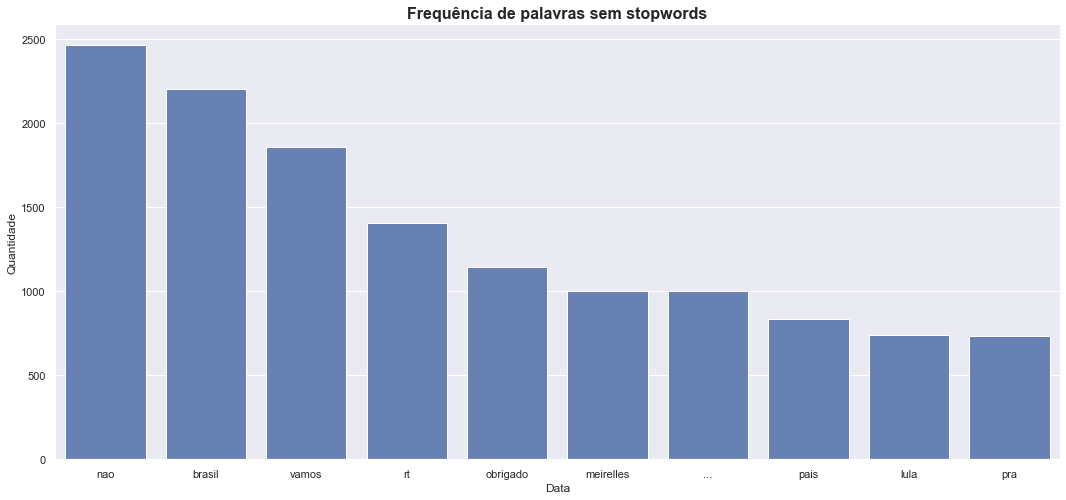

In [60]:
#Grafico palavras mais relevantes
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color="#597DBF",ci=None)
ax.set(ylabel = "Quantidade", xlabel = "Data")
plt.title('Frequência de palavras sem stopwords', fontsize=16, fontweight='bold')
plt.show()

In [61]:
#Tratar radicais
nltk.download('rslp') #importa caso precise

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\evert\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [62]:
stemmer = nltk.RSLPStemmer()
#Transformar em radicais
def stemmer_stop_words(texto):
    stop_words = nltk.corpus.stopwords.words("portuguese")
    token_pontuacao = tokenize.WordPunctTokenizer()
    nova_msg = list()
    for t in texto:
        frase = list()
        conteudo_msg = token_pontuacao.tokenize(t)
        for msg in conteudo_msg:
             frase.append(stemmer.stem(msg))
        nova_msg.append(' '.join(frase))
    return nova_msg

df["mensagem_tratada"] = stemmer_stop_words(df["mensagem_tratada"])
print("Frase tratada:\n")
print(df["mensagem_tratada"][0])

Frase tratada:

naca brasil conhec obr sei voc nao fri quent melhor fri quent assim porqu voc morn nao fri ...


In [63]:
todas_palavras = ' '.join([texto for texto in df["mensagem_tratada"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
df_frequencia

Palavra  Frequência
1      brasil        2883
6         nao        2465
299       vam        1862
162        rt        1407
118       tod        1251
110     obrig        1177
320    govern        1026
2993  meirell        1005
13        ...         999
28        vot         994

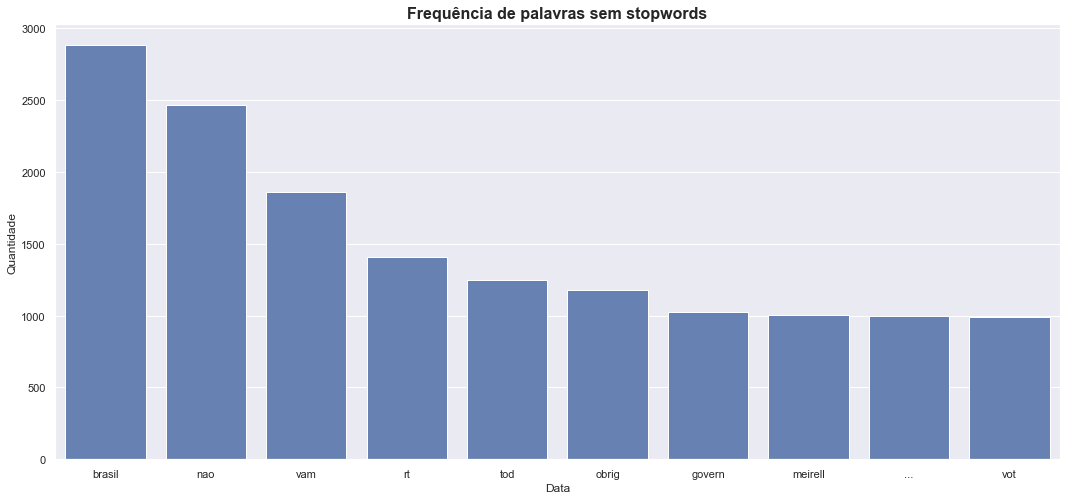

In [64]:
#Grafico radicais mais relevantes
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color="#597DBF",ci=None)
ax.set(ylabel = "Quantidade", xlabel = "Data")
plt.title('Frequência de palavras sem stopwords', fontsize=16, fontweight='bold')
plt.show()

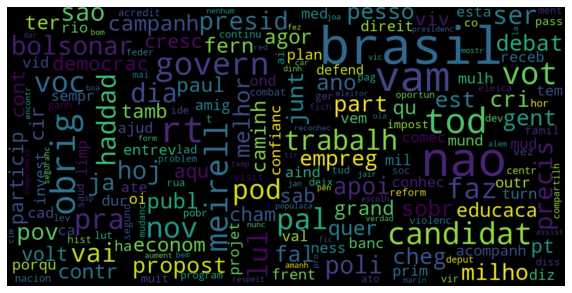

In [65]:
#Verifica nuvem de palavras após tratamento stemmer
nuvem_palavras(df["mensagem_tratada"])

In [66]:
#Instalar o Vader para análise de sentimentos
#pip install vaderSentiment
#Foi alterado o arquivo vaderSentiment.py para adequar-se a linguagem pt-br
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
#Analisar sentimentos das mensagens
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#analyzer.polarity_scores("Que coisa feia!")

def analise_mensagem(texto):
    sentimento_msg = list()
    for t in texto:
        df_analisado = analyzer.polarity_scores(t)['compound'] 
        sentimento_msg.append(df_analisado)
    return sentimento_msg

df["compound"] = analise_mensagem(df["mensagem"])

NameError: name 'df' is not defined

In [3]:
# aplicando a função e guardando na coluna new_review
df_pos = df[(df['compound'] > 0)]
df_neg = df[(df['compound'] < 0)]
df_neutro = df[(df['compound'] == 0)]

print("Frase tratada:\n")
print(len(df_pos))
print(len(df_neg))
print(len(df_neutro))

NameError: name 'df' is not defined

In [69]:
df.head()

tweet num_retweets num_likes  \
0  NAÇÃO BRASILEIRA.                         Conh...           55       839   
1  Seguirei o caminho da integridade;quando virás...           59      1094   
3  Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                            @isamovitz Deus abençoe            0        12   
5  Eu posso ser crente menino, mas não adultero.E...          574      4296   

          user       data data_resumo  dia dia_semana  mes   ano  \
0  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
1  cabodaciolo 2018-10-27       27/10   27        Sab   10  2018   
3  cabodaciolo 2018-10-20       20/10   20        Sab   10  2018   
4  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   
5  cabodaciolo 2018-10-18       18/10   18        Qui   10  2018   

                                            mensagem                     http  \
0  nacao brasileira conheco as suas obras sei que...  https://t.co/4fONrjpi4u   
1  seguirei o caminho da integridade quando viras...  https://t.co/2GScum3nct   
3                   voto em cedulas ja gloria a deus  https://t.co/kG0X7YliKB   
4                                       deus abencoe                            
5  eu posso ser crente menino mas nao adultero eu...  https://t.co/GwYTxXhMxW   

   tam_mensagem                                   mensagem_tratada  compound  
0           207  naca brasil conhec obr sei voc nao fri quent m...    0.4019  
1           170  segu caminh integr vir encontr cas viv coraca ...    0.3818  
3            56                              vot cedul ja glor deu    0.6808  
4            23                                         deu abenco    0.5994  
5           118  poss ser crent menin nao adulter poss ser cren...   -0.5267

In [70]:
# aplicando a função e guardando na coluna new_review
def classifica_sentimento(compound):
    sentimento = 'neutro'
    if(compound <= -0.05):
        sentimento = 'negativo'
    elif(compound >= 0.05):
        sentimento = 'positivo'
    return sentimento
#df.loc[:, 'tam_mensagem'] = df.tweet.apply(lambda x: len(x))
df.loc[:, 'review'] = df.compound.apply(lambda x: classifica_sentimento(x))

In [71]:
df.head(50)

tweet num_retweets num_likes  \
0   NAÇÃO BRASILEIRA.                         Conh...           55       839   
1   Seguirei o caminho da integridade;quando virás...           59      1094   
3   Voto em cédulas JÁ!Glória a Deus https://t.co/...          107       871   
4                             @isamovitz Deus abençoe            0        12   
5   Eu posso ser crente menino, mas não adultero.E...          574      4296   
6                  @andersonfelix94 Deus te abençoe 🙏            3       172   
7   @higxrr @YouTube Deus abençoe sr José Glória a...            2        52   
8     @avrc41 @Jotapecrf_99 Deus te abençoe meu amigo            1       276   
9   Decifrando Códigos: Estátua da Liberdade (Hist...           82       471   
10  “Só vim aqui mostrar pra nação que nem corda, ...         4036     15132   
11  Glória a Deus.                           Aquel...          873      9846   
12  "Há a lei das eleições, que é a 9.504/97,que c...         4585     18185   
13  TRANSMISSÃO AO VIVO (FACEBOOK)HOJE, SEGUNDA-FE...          288      3826   
14  Meu dia seguinte❤️Glória a Deus https://t.co/V...         5490     34065   
16  Amo todos vocês.                  “Desde o iní...          137      2314   
17  TRANSMISSÃO AO VIVO (FACEBOOK) HOJE, SÁBADO!NO...          116       976   
18  @heavypotter @clauclaurainha Deus abençoe vcs ...            0        19   
19                            @Sra_Amell Deus abençoe            1        14   
20             @AndreaaJamile Janaína Deus te abençoe            1        33   
21                      @GersonDCastro81 Deus abençoe            1        30   
22          @markribis Cabo Daciolo51 Deus te abençoe            7       193   
23                    @nivolyy Carla Deus te abençoe.          109       486   
24                         @MarcoDs32 51 Deus abençoe            1        54   
25                           @nairax_ Deus abençoe 51            4       128   
26               @gabrielaschuIz Deus abençoe Gabi 51            1         4   
27            @castilhojac Um beijo e Deus abençoe ❤️           21       547   
28  @Xnthunder @BrunnoHGOficial @hiperavictor @lui...           49       637   
29                                     @Dinelli_23 51           18       624   
30            CABO DACIOLO 51 https://t.co/8VQCK2j5tE        31812     68714   
31  CABO DACIOLO51 COM GABEIRA 23h 23h 23h@fernand...          130      1397   
32  Glória a Deus.                                ...          181      1185   
33  RT @Miltonneves: Esse debate sem Bolsonaro e D...         4843         0   
34  @_extra_extra Berenice❤️ 51 https://t.co/rPItl...            0        11   
35  #DacioloNaGlobo CABO DACIOLO 51 https://t.co/Q...          265      1852   
36  Estamos ao vivo                      https://t...           93       668   
37  DEBATE - GLOBO O nosso partido recorreu junto ...         1271      7528   
38  Amigos,Hoje TERÍAMOS  mais um encontro suave e...         2268      8332   
39  Obrigado a rádio "Barba, cabelo e bigode" http...         1507      5527   
40                                       @kaueod FAKE           10        54   
41  CABO DACIOLO 51Assim, permanecem agora estes t...         1738     11327   
42  @mariana_godoy @AlexSoaresMusic O próximo.@mar...           27       202   
43  RT @agencialupa: A campanha de @CaboDaciolo já...          400         0   
44              Glória a Deus https://t.co/2zx6KAd4nT        23552     90980   
45         #MarianaGodoy Amém https://t.co/9Y7uzAknGj          615      2903   
46              Glória a Deus https://t.co/yWzxfqfkPl         4297     15973   
47  RT @JonatasNunes88: Cabo Daciolo é uma figura,...         1712         0   
48  Deus abençoe e me conceda sabedoria.#cabodacio...          206      2383   
49  Aguardo vocês.             #Daciolo51 https://...         1348      7623   
50  PERFIS FAKES!Peço ATENÇÃO REDOBRADA às pessoas...          694      3938   
51  Deus é AMOR.                                

In [72]:
#Tweets por review
df_qtde_reviews = df.groupby(['review']).size().reset_index(name='quantidade')
df_qtde_reviews.head()

review  quantidade
0  negativo        3364
1    neutro        2787
2  positivo        4874

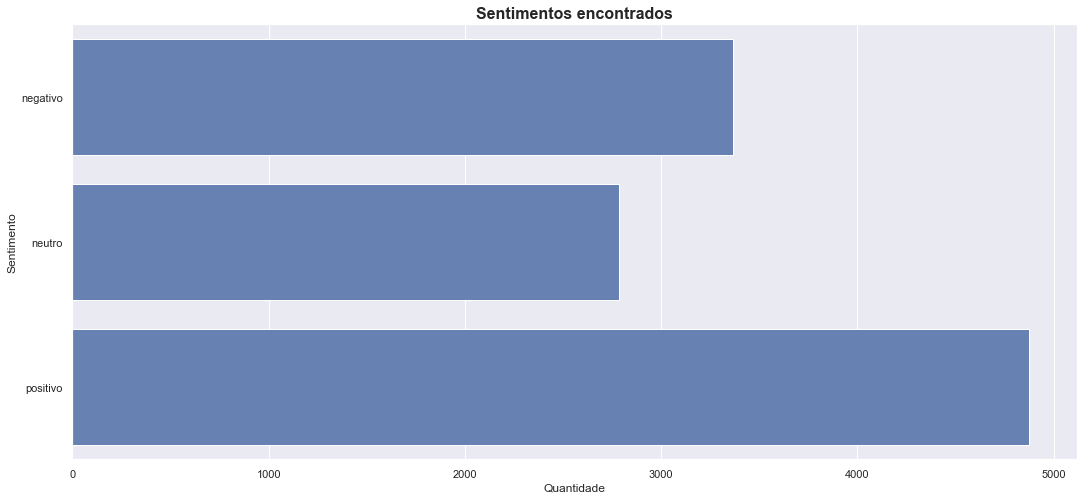

In [73]:
#Gráfico Total de tweets por candidato
df_qtde_reviews.nlargest(columns = "quantidade", n = 5)
plt.figure(figsize=(18,8))
ax = sns.barplot(data = df_qtde_reviews, y= "review", x = "quantidade"
                 , color="#597DBF"
                 ,orient = 'h'
                 ,ci=None)
ax.set(ylabel = "Sentimento", xlabel = "Quantidade")
plt.title('Sentimentos encontrados', fontsize=16, fontweight='bold')
plt.show()

In [74]:
#Tweets por candidatos review
df_candidato_review = df.groupby(['user','review']).size().reset_index(name='quantidade')
df_candidato_review.head()

user    review  quantidade
0  cabodaciolo  negativo           7
1  cabodaciolo    neutro          13
2  cabodaciolo  positivo          40
3    cirogomes  negativo         159
4    cirogomes    neutro         240

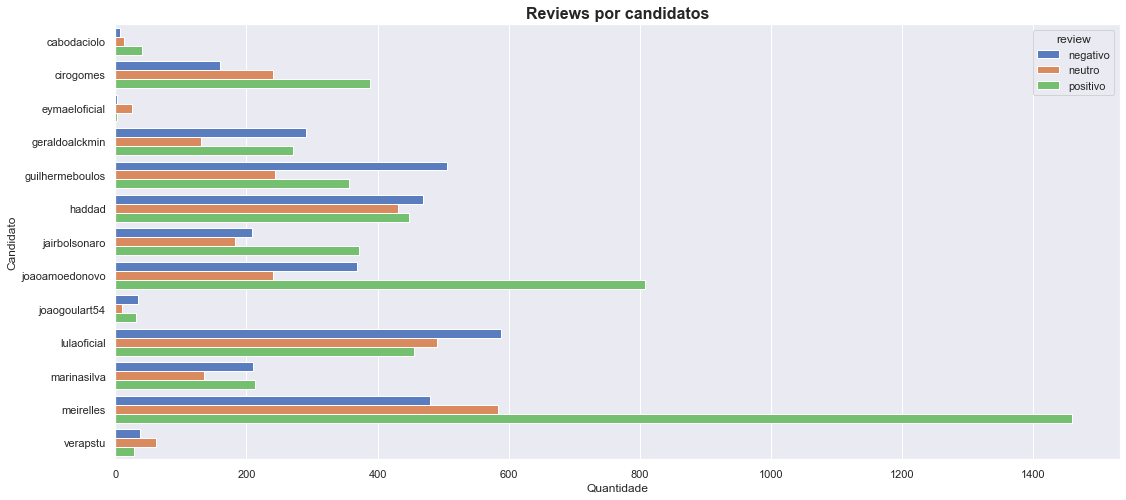

In [75]:
#Gráfico Reviews por candidatos 
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_candidato_review["quantidade"]
                    , y=df_candidato_review["user"]
                    , data=df_candidato_review
                    , palette="muted"
                   ,hue=df_candidato_review["review"])
ax.set(ylabel = "Candidato", xlabel = "Quantidade")
plt.title('Reviews por candidatos', fontsize=16, fontweight='bold')
plt.show()

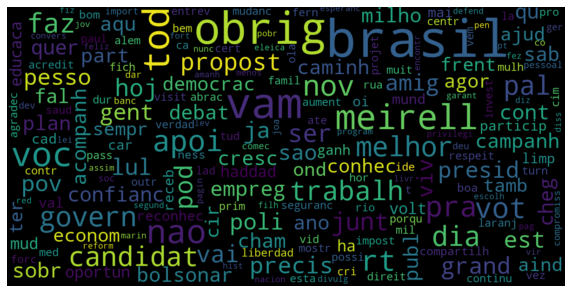

In [76]:
#Verifica nuvem de palavras positivas após tratamento stemmer
df_mensagem_pos = df[(df["review"] == 'positivo')]
nuvem_palavras(df_mensagem_pos["mensagem_tratada"])

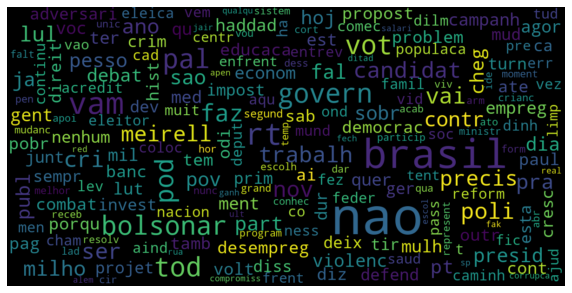

In [77]:
#Verifica nuvem de palavras negativas após tratamento stemmer
df_mensagem_neg = df[(df["review"] == 'negativo')]
nuvem_palavras(df_mensagem_neg["mensagem_tratada"])

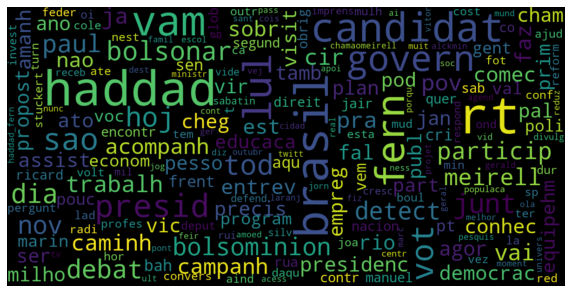

In [78]:
#Verifica nuvem de palavras neutras após tratamento stemmer
df_mensagem_neutro = df[(df["review"] == 'neutro')]
nuvem_palavras(df_mensagem_neutro["mensagem_tratada"])

In [79]:
#Tweets por data candidatos primeiro turno
df_primeiro_turno = df[(df['data'] < '2018-10-07')]
df_primeiro_turno.head()

tweet num_retweets num_likes  \
17  TRANSMISSÃO AO VIVO (FACEBOOK) HOJE, SÁBADO!NO...          116       976   
18  @heavypotter @clauclaurainha Deus abençoe vcs ...            0        19   
19                            @Sra_Amell Deus abençoe            1        14   
20             @AndreaaJamile Janaína Deus te abençoe            1        33   
21                      @GersonDCastro81 Deus abençoe            1        30   

           user       data data_resumo  dia dia_semana  mes   ano  \
17  cabodaciolo 2018-10-06       06/10    6        Sab   10  2018   
18  cabodaciolo 2018-10-06       06/10    6        Sab   10  2018   
19  cabodaciolo 2018-10-06       06/10    6        Sab   10  2018   
20  cabodaciolo 2018-10-06       06/10    6        Sab   10  2018   
21  cabodaciolo 2018-10-06       06/10    6        Sab   10  2018   

                                             mensagem  \
17  transmissao ao vivo facebook hoje sabado novo ...   
18                        deus abencoe vcs grande abc   
19                                       deus abencoe   
20                            janaina deus te abencoe   
21                                       deus abencoe   

                       http  tam_mensagem  \
17  https://t.co/ePeeB9re6K           156   
18                                     56   
19                                     23   
20                                     38   
21                                     29   

                                     mensagem_tratada  compound    review  
17  transmissa viv facebook hoj sab nov horari 21h...    0.5719  positivo  
18                            deu abenco vc grand abc    0.7845  positivo  
19                                         deu abenco    0.5994  positivo  
20                                  janain deu abenco    0.5994  positivo  
21                                         deu abenco    0.5994  positivo

In [80]:
#Tweets por data candidatos primeiro turno
df_candidato_review = df_primeiro_turno.groupby(['user','review']).size().reset_index(name='quantidade')
df_candidato_review.head()

user    review  quantidade
0  cabodaciolo  negativo           5
1  cabodaciolo    neutro          13
2  cabodaciolo  positivo          27
3    cirogomes  negativo         155
4    cirogomes    neutro         238

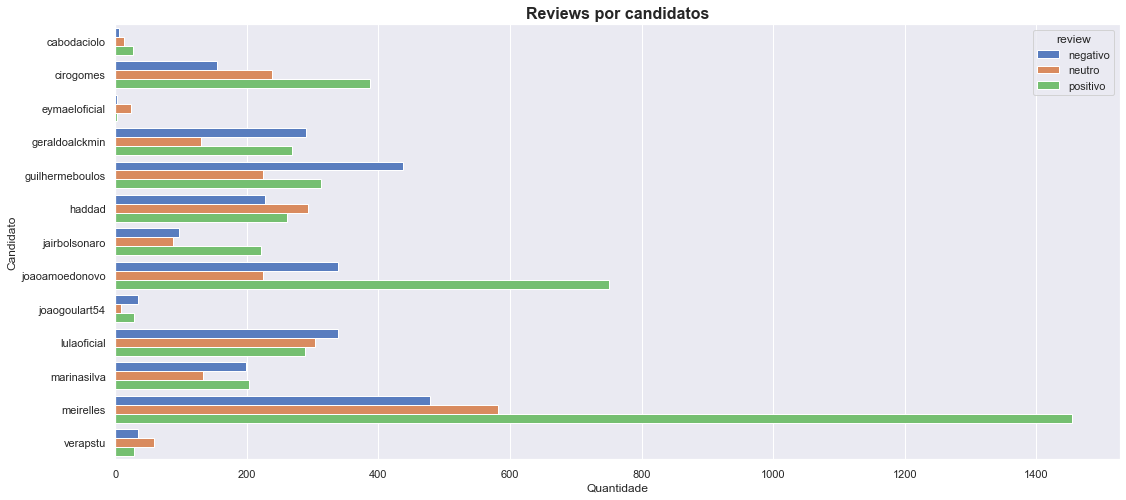

In [81]:
#Gráfico Reviews por candidatos primeiro turno
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_candidato_review["quantidade"]
                    , y=df_candidato_review["user"]
                    , data=df_candidato_review
                    , palette="muted"
                   ,hue=df_candidato_review["review"])
ax.set(ylabel = "Candidato", xlabel = "Quantidade")
plt.title('Reviews por candidatos', fontsize=16, fontweight='bold')
plt.show()

In [82]:
#Verifica segundo turno
#Analisado apenas os perfis de Fernando Haddad e Jair Bolsonaro
df_seg_turno = df[(df['user'] == 'jairbolsonaro') | (df['user'] == 'haddad')]
df_seg_turno = df_seg_turno[(df_seg_turno['data'] > '2018-10-07')]
df_seg_turno.head()

tweet num_retweets  \
3069  Gostaria de agradecer os 45 milhões de eleitor...        40670   
3070  Gostaria de agradecer meus antepassados que me...        19379   
3072  Neste domingo, conto com seu voto para recobra...        16978   
3073  É inadmissível o assassinato de um jovem, Char...        10491   
3074  RT @patriciapillar: Eu acredito na virada de @...         6781   

     num_likes    user       data data_resumo  dia dia_semana  mes   ano  \
3069    257046  haddad 2018-10-28       28/10   28        Dom   10  2018   
3070    122490  haddad 2018-10-28       28/10   28        Dom   10  2018   
3072     76105  haddad 2018-10-28       28/10   28        Dom   10  2018   
3073     47230  haddad 2018-10-28       28/10   28        Dom   10  2018   
3074         0  haddad 2018-10-28       28/10   28        Dom   10  2018   

                                               mensagem http  tam_mensagem  \
3069  gostaria de agradecer os 45 milhoes de eleitor...                132   
3070  gostaria de agradecer meus antepassados que me...                161   
3072  neste domingo conto com seu voto para recobrar...                276   
3073  e inadmissivel o assassinato de um jovem charl...                272   
3074                 rt eu acredito na virada de e !!!!                 83   

                                       mensagem_tratada  compound    review  
3069  gost agradec 45 milho elei acompanh part expre...    0.0000    neutro  
3070  gost agradec antepass ensin val corag defend j...    0.9324  positivo  
3072  nest doming cont vot recobr foleg democrac afa...   -0.2500  negativo  
3073  inadmissi assassinat jov charlion less albuque...   -0.8442  negativo  
3074                                rt acredit vir !!!!    0.0000    neutro

In [83]:
#Tweets por data candidatos primeiro turno
df_candidato_review = df_seg_turno.groupby(['user','review']).size().reset_index(name='quantidade')
df_candidato_review.head(20)

user    review  quantidade
0         haddad  negativo         242
1         haddad    neutro         137
2         haddad  positivo         187
3  jairbolsonaro  negativo         112
4  jairbolsonaro    neutro          94
5  jairbolsonaro  positivo         146

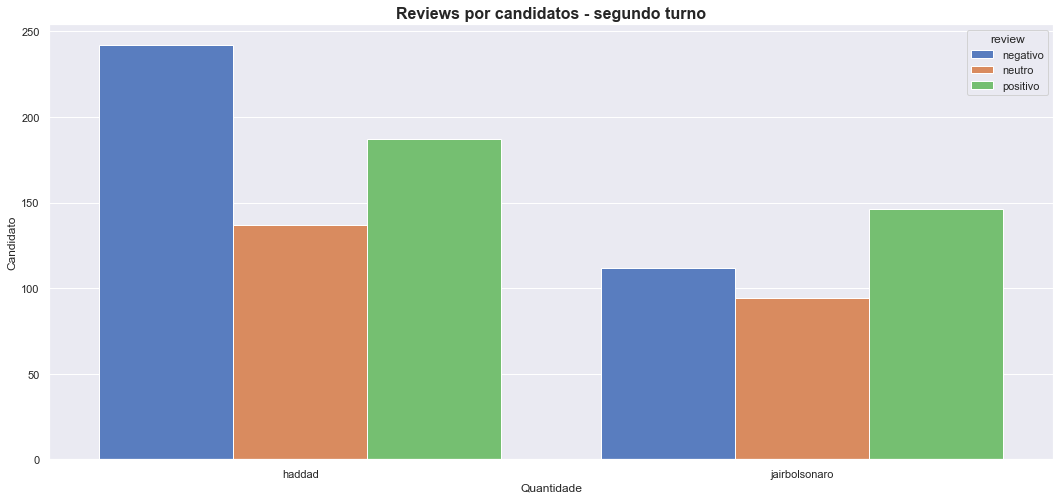

In [84]:
#Gráfico Reviews por candidatos segundo turno
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_candidato_review["user"]
                    , y=df_candidato_review["quantidade"]
                    , data=df_candidato_review
                    , palette="muted"
                   ,hue=df_candidato_review["review"])
ax.set(ylabel = "Candidato", xlabel = "Quantidade")
plt.title('Reviews por candidatos - segundo turno', fontsize=16, fontweight='bold')
plt.show()

In [85]:
#Verifica segundo turno
#Analisado apenas Jair Bolsonaro
df_seg_turno_bolsonaro = df[(df['user'] == 'jairbolsonaro')]
df_seg_turno_bolsonaro = df_seg_turno_bolsonaro[(df_seg_turno_bolsonaro['data'] > '2018-10-07')]
df_seg_turno_bolsonaro.head()

tweet num_retweets  \
4453  Jair Bolsonaro fala pela primeira vez como Pre...         4995   
4454  Obrigado pela confiança! Vamos juntos mudar o ...        28053   
4455                                       BRASIL! 🇧🇷👍🏻        49605   
4457  ATÉ A VITÓRIA, SE DEUS QUISER! 🇧🇷🇧🇷🇧🇷🇧🇷 https:...        19031   
4458  Depois de décadas, o Brasil finalmente tem a c...        17053   

     num_likes           user       data data_resumo  dia dia_semana  mes  \
4453     33075  jairbolsonaro 2018-10-28       28/10   28        Dom   10   
4454    132289  jairbolsonaro 2018-10-28       28/10   28        Dom   10   
4455    206451  jairbolsonaro 2018-10-28       28/10   28        Dom   10   
4457     89968  jairbolsonaro 2018-10-28       28/10   28        Dom   10   
4458     73121  jairbolsonaro 2018-10-28       28/10   28        Dom   10   

       ano                                           mensagem  \
4453  2018  jair bolsonaro fala pela primeira vez como pre...   
4454  2018  obrigado pela confianca vamos juntos mudar o b...   
4455  2018                                            brasil    
4457  2018                      ate a vitoria se deus quiser    
4458  2018  depois de decadas o brasil finalmente tem a ch...   

                         http  tam_mensagem  \
4453  https://t.co/zOavZ1SG7D            85   
4454  https://t.co/eeAdr0dc13            77   
4455                                     12   
4457  https://t.co/gSy1hyQt28            63   
4458  https://t.co/bFn17omhAp           298   

                                       mensagem_tratada  compound    review  
4453            jair bolsonar fal prim vez presid eleit    0.0000    neutro  
4454                 obrig confianc vam junt mud brasil    0.6705  positivo  
4455                                             brasil    0.0000    neutro  
4457                                 ate vitor deu quis    0.2732  positivo  
4458  dec brasil final chanc eleg presid carreg verd...    0.8834  positivo

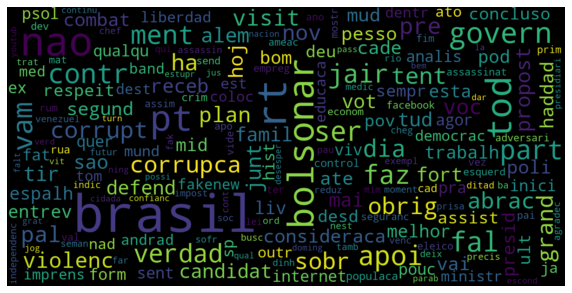

In [105]:
nuvem_palavras(df_seg_turno_bolsonaro["mensagem_tratada"])

In [86]:
#Tweets bolsonaro
df_quantidade_bolsonaro = df_seg_turno_bolsonaro.groupby(['review']).size().reset_index(name='quantidade')
df_quantidade_bolsonaro.head()

review  quantidade
0  negativo         112
1    neutro          94
2  positivo         146

In [87]:
#Proporção reviews Jair Bolsonaro
#Gráfico % de mensagens enviadas no segundo turno
fig = go.Figure(data = [go.Pie(labels = [df_quantidade_bolsonaro['review'][0] + ' (' + str(df_quantidade_bolsonaro['quantidade'][0]) + ')'
                                         ,df_quantidade_bolsonaro['review'][1] + ' (' + str(df_quantidade_bolsonaro['quantidade'][1]) + ')'
                                         ,df_quantidade_bolsonaro['review'][2] + ' (' + str(df_quantidade_bolsonaro['quantidade'][2]) + ')'
                                        ]
                               ,values = [df_quantidade_bolsonaro['quantidade'][0]
                                          , df_quantidade_bolsonaro['quantidade'][1]
                                          , df_quantidade_bolsonaro['quantidade'][2]
                                         ]
                               ,hole = .4,showlegend=False
                               , textinfo = 'label+percent', hoverinfo = 'value')])
fig.update_layout(template="plotly", title = go.layout.Title(text = "Proporção de sentimentos enviados por Bolsonaro",xref = "paper", x=0.5))
fig.update_traces(textposition='inside', textfont=dict(size=13,color="white"))
fig.show()

In [88]:
#Verifica segundo turno
#Analisado apenas Fernando Haddad
df_seg_turno_haddad = df[(df['user'] == 'haddad')]
df_seg_turno_haddad = df_seg_turno_haddad[(df_seg_turno_haddad['data'] > '2018-10-07')]
df_seg_turno_haddad.head()

tweet num_retweets  \
3069  Gostaria de agradecer os 45 milhões de eleitor...        40670   
3070  Gostaria de agradecer meus antepassados que me...        19379   
3072  Neste domingo, conto com seu voto para recobra...        16978   
3073  É inadmissível o assassinato de um jovem, Char...        10491   
3074  RT @patriciapillar: Eu acredito na virada de @...         6781   

     num_likes    user       data data_resumo  dia dia_semana  mes   ano  \
3069    257046  haddad 2018-10-28       28/10   28        Dom   10  2018   
3070    122490  haddad 2018-10-28       28/10   28        Dom   10  2018   
3072     76105  haddad 2018-10-28       28/10   28        Dom   10  2018   
3073     47230  haddad 2018-10-28       28/10   28        Dom   10  2018   
3074         0  haddad 2018-10-28       28/10   28        Dom   10  2018   

                                               mensagem http  tam_mensagem  \
3069  gostaria de agradecer os 45 milhoes de eleitor...                132   
3070  gostaria de agradecer meus antepassados que me...                161   
3072  neste domingo conto com seu voto para recobrar...                276   
3073  e inadmissivel o assassinato de um jovem charl...                272   
3074                 rt eu acredito na virada de e !!!!                 83   

                                       mensagem_tratada  compound    review  
3069  gost agradec 45 milho elei acompanh part expre...    0.0000    neutro  
3070  gost agradec antepass ensin val corag defend j...    0.9324  positivo  
3072  nest doming cont vot recobr foleg democrac afa...   -0.2500  negativo  
3073  inadmissi assassinat jov charlion less albuque...   -0.8442  negativo  
3074                                rt acredit vir !!!!    0.0000    neutro

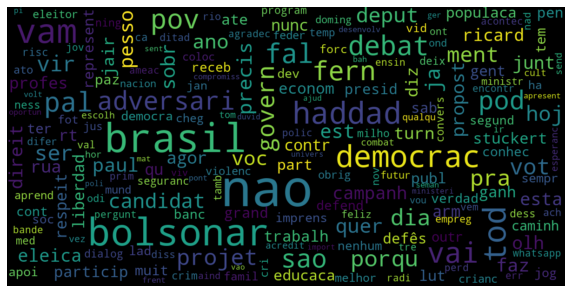

In [106]:
nuvem_palavras(df_seg_turno_haddad["mensagem_tratada"])

In [89]:
#Tweets bolsonaro
df_quantidade_haddad = df_seg_turno_haddad.groupby(['review']).size().reset_index(name='quantidade')
df_quantidade_haddad.head()

review  quantidade
0  negativo         242
1    neutro         137
2  positivo         187

In [90]:
#Proporção reviews Jair Bolsonaro
#Gráfico % de mensagens enviadas no segundo turno
fig = go.Figure(data = [go.Pie(labels = [df_quantidade_haddad['review'][0] + ' (' + str(df_quantidade_haddad['quantidade'][0]) + ')'
                                         ,df_quantidade_haddad['review'][1] + ' (' + str(df_quantidade_haddad['quantidade'][1]) + ')'
                                         ,df_quantidade_haddad['review'][2] + ' (' + str(df_quantidade_haddad['quantidade'][2]) + ')'
                                        ]
                               ,values = [df_quantidade_haddad['quantidade'][0]
                                          , df_quantidade_haddad['quantidade'][1]
                                          , df_quantidade_haddad['quantidade'][2]
                                         ]
                               ,hole = .4,showlegend=False
                               , textinfo = 'label+percent', hoverinfo = 'value')])
fig.update_layout(template="plotly", title = go.layout.Title(text = "Proporção de sentimentos enviados por Haddad",xref = "paper", x=0.5))
fig.update_traces(textposition='inside', textfont=dict(size=13,color="white"))
fig.show()

### Acurácia do modelo

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
#Ajustar review para classificador
classificacao = df["review"].replace(["negativo", "positivo", "neutro"],[-1, 0, 1])
df["classificacao"] = classificacao

In [93]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                 texto[coluna_classificacao],
                                                                 random_state = 42)
    
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    
    return regressao_logistica.score(teste, classe_teste)

acuracia_teste = classificar_texto(df, "mensagem", "classificacao")
print(acuracia_teste)

0.6474428726877041


In [94]:
from sklearn.feature_extraction.text import CountVectorizer

textos = df["mensagem_tratada"]
vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(textos)

In [95]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              df["classificacao"],
                                                              random_state = 42)

In [98]:
tfidf = TfidfVectorizer(lowercase=False)
#vetor_tfidf = tfidf.fit_transform(df["mensagem"])

In [100]:
regressao_logistica = LogisticRegression(solver="lbfgs")
tfidf_bruto = tfidf.fit_transform(df["tweet"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              df["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.773304316285818


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [112]:
regressao_logistica = LogisticRegression(solver="lbfgs")
tfidf_bruto = tfidf.fit_transform(df["mensagem"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              df["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.8019586507072906


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [110]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(20,0)

0
nao        7.526096
ai         3.836720
cris       3.558297
violenc    3.271668
lut        3.098721
vao        2.835739
odi        2.704298
crim       2.565356
adversari  2.550584
problem    2.545204
ment       2.377175
med        2.350834
pobr       2.191986
falt       2.042794
cim        2.017686
banc       2.014753
golp       1.906609
desempreg  1.869067
grav       1.852952
process    1.714125

In [111]:
pesos.nsmallest(20,0)

0
obrig    -4.125966
melhor   -2.022182
ha       -1.844163
amig     -1.840480
mai      -1.824561
favor    -1.783215
seguranc -1.484126
liberdad -1.476704
abrac    -1.437462
jus      -1.394849
feliz    -1.351477
boa      -1.332214
verdad   -1.332035
oportun  -1.313962
gost     -1.303282
confianc -1.299914
sim      -1.263588
ganh     -1.226427
fern     -1.211180
sucess   -1.207673